In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
visa_df=pd.read_csv(r"C:\Users\animi\OneDrive\NareshIT\DataFiles\Visadataset.csv")
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**Box plot**

- box plot is used for detect outliers

- box plot has minimum value, q1 value, q2 value, q3 vale and max value

- Inside box plot the red line represents median which is 50 percentile data

**Outlier**

- very very huge observation

- very very small observation

- which pull the data in any side of the distribution

- Mild outliers

    - q1-1.5*IQR  and q3+1.5*IQR

- Strong Outliers

    - q1-3*IQR  and  q3+3*IQR

- IQR : Inter Quartile Range

    - IQR=Q3-Q1
 
- q1 means: 25p

- q2: 50p

- q3: 75p
  

In [ ]:
Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR

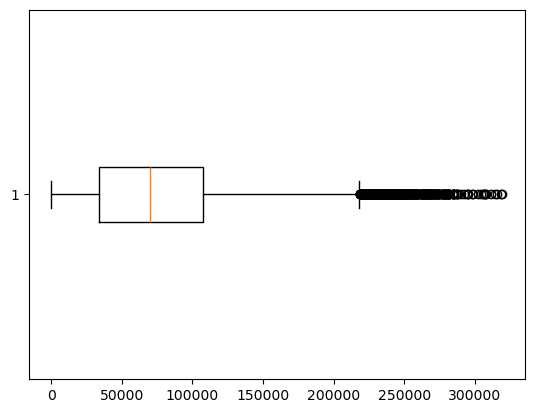

In [5]:
import matplotlib.pyplot as plt

plt.boxplot(visa_df['prevailing_wage'], vert=False)
plt.show()

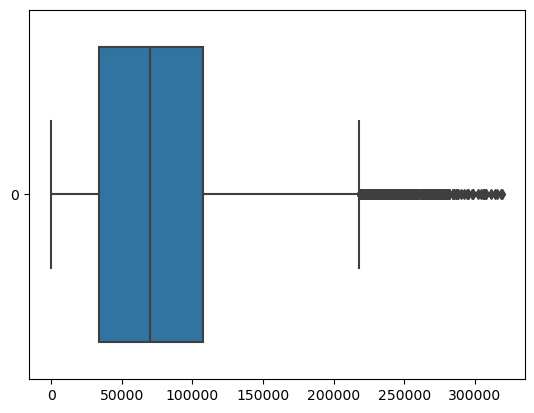

In [10]:
sns.boxplot(visa_df['prevailing_wage'], orient='h')
plt.show()

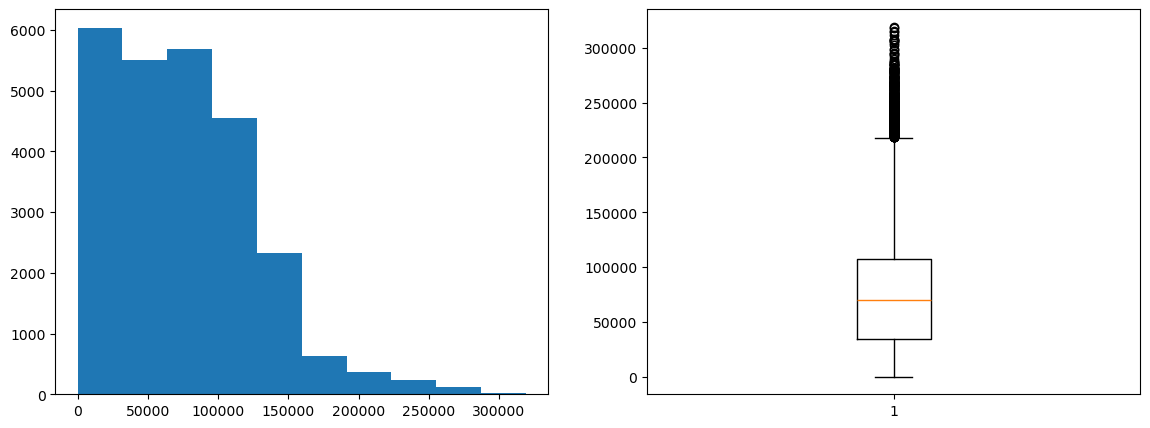

In [14]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])  # histogram
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage']) # box plot
plt.show()

**Outlier Analysis (OR) Finding the outliers**

- outliers are availble less than q1-1.5*IQR

- outliers are available greater than q3+1.5*IQR

- Now we need to find outliers

- Step-1:

    - calculate Q1 (25p)
      
    - calculate Q3 (75p)

    - calculate IQR: Q3-Q1
      
 
- step-2:

    - LB(lower bound) = Q1-1.5*IQR

    - UB(upper bound) = Q3+1.5*IQR

- step-3:

    - con1=visa_df['prevailing_wafe']<LB

    - con2=visa_df['prevailing_wafe']>UB

    - apply OR operator and get the outliers data

**Outliers Data**

In [32]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q1

34015.48

In [27]:
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
Q3

107735.51

In [18]:
IQR=Q3-Q1
IQR

73720.03250000002

In [19]:
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
LB,UB

(-76564.56875000002, 218315.56125000003)

In [29]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

427

In [34]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
outliers_data=visa_df[con1 | con2]
len(outliers_data)

427

**Non-Outliers Data (means data Frame)**

In [36]:
Q1=round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3=round(np.percentile(visa_df['prevailing_wage'],75),2)
LB=Q1-1.5*IQR
UB=Q3+1.5*IQR
con1=visa_df['prevailing_wage']>LB
con2=visa_df['prevailing_wage']<UB
non_outliers_data=visa_df[con1 & con2]
len(non_outliers_data)

25053

**plot histogram and boxplot for non-outliers data**

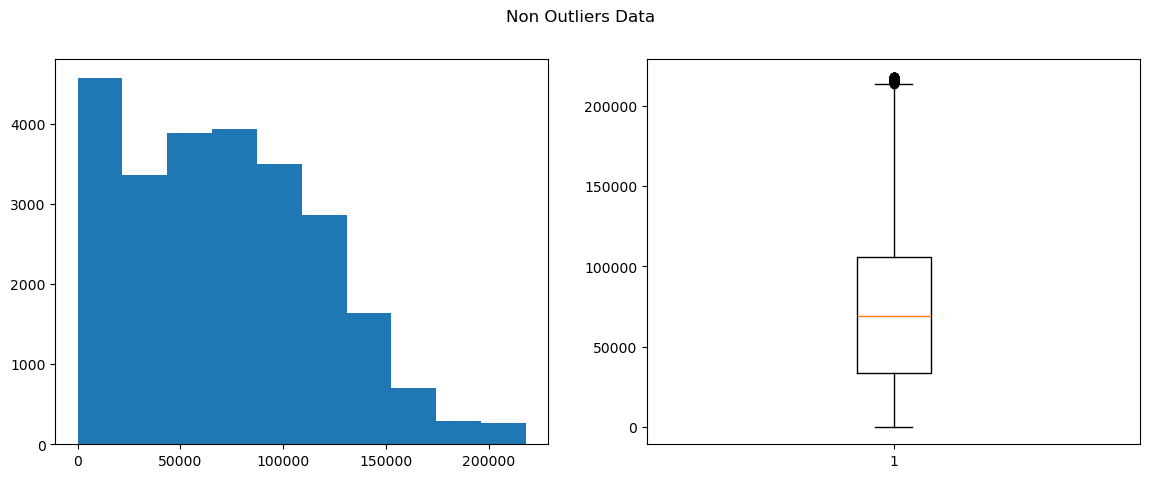

In [37]:
plt.figure(figsize=(14,5))
plt.suptitle("Non Outliers Data")
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])
plt.show()

In [ ]:
**comparing Total data with non outliers data**

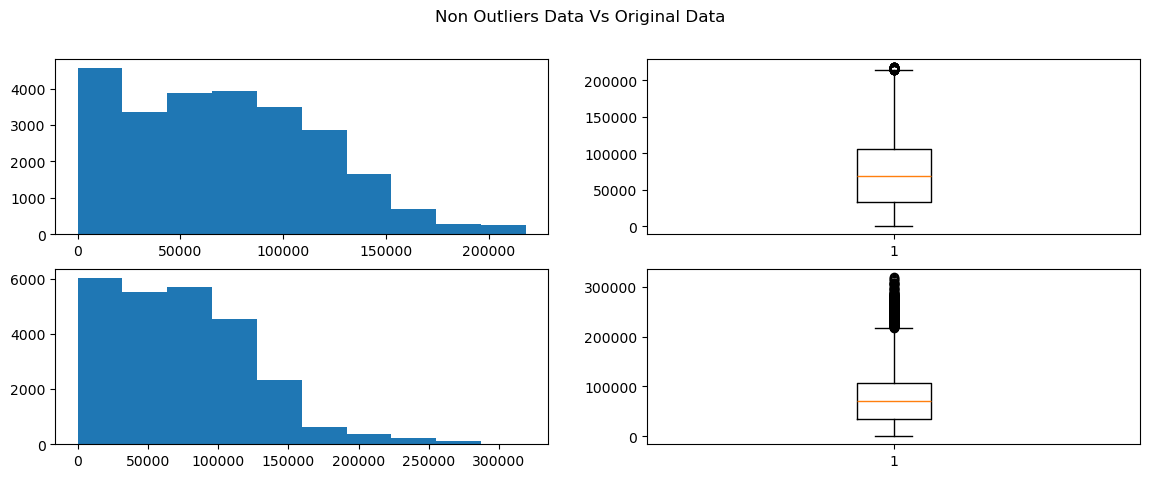

In [42]:
plt.figure(figsize=(14,5))
plt.suptitle("Non Outliers Data Vs Original Data")

plt.subplot(2,2,1).hist(non_outliers_data['prevailing_wage'])  # 25053
plt.subplot(2,2,2).boxplot(non_outliers_data['prevailing_wage'])  # 25053


plt.subplot(2,2,3).hist(visa_df['prevailing_wage'])  # 25480
plt.subplot(2,2,4).boxplot(visa_df['prevailing_wage'])  # 25480

plt.show()

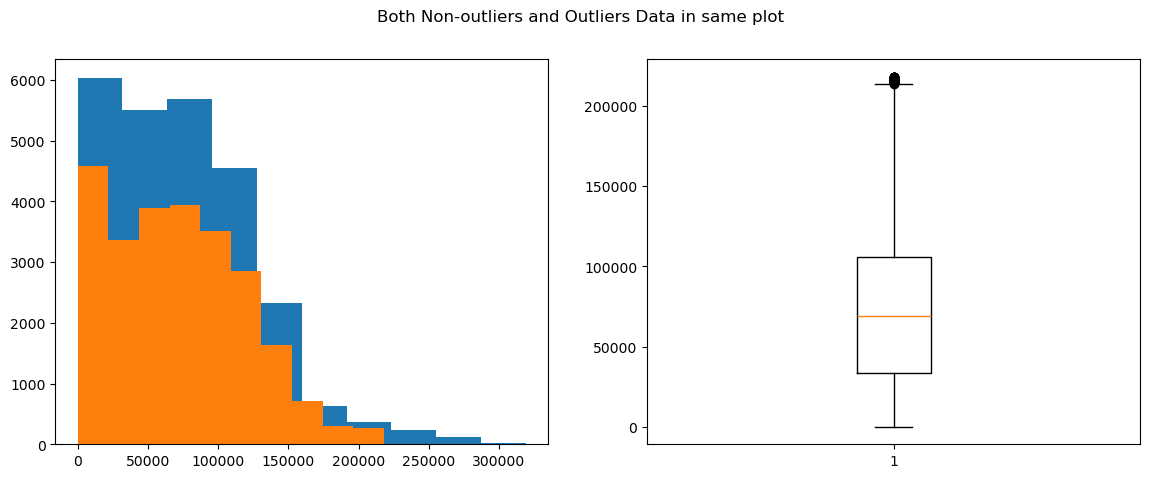

In [46]:
plt.figure(figsize=(14,5))
plt.suptitle("Both Non-outliers and Outliers Data in same plot")

plt.subplot(1,2,1).hist(visa_df['prevailing_wage'])  # 25480 # original data
plt.subplot(1,2,1).hist(non_outliers_data['prevailing_wage'])  # 25053 
plt.subplot(1,2,2).boxplot(non_outliers_data['prevailing_wage'])  # 25053
plt.show()

**How to deal the outliers**

**Method-1: Drop the outliers**

    - Drop the outliers is not a good idea

    - When you drop the outlier, data will loss

    - For example here we are dropping 427 rows

    - x% of 25480=427

    - it is 1.7% data, here it is fine we can drop the outlier

**Method-2: Fill with medain value**

    - we already know that outliers does not effect the medain

    - so we can fill outliers by median

**Method-3: Cap the values with Q1 and Q3**

    - all lessthan lower bound values we can replace with Q1 or LB

    - all greaterthan upper bound values we can replace with Q1 or UB

**Method-2: Fill with medain value**

- create empty list

- Iterate the visa_df['prevailing_wage'].value

- If each value, i.e., i  is lessathan LB or  greater than UB then append with median value

- else append with i value

In [51]:
visa_df['prevailing_wage'].values


array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

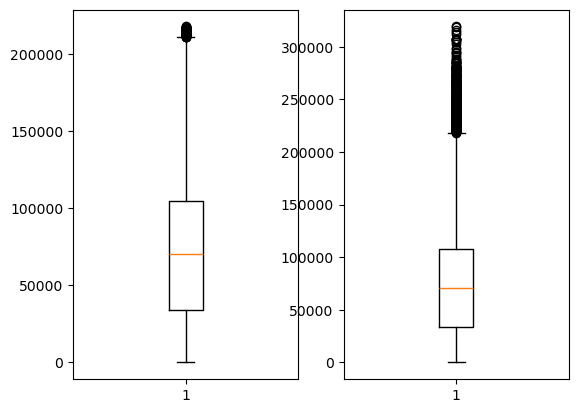

In [55]:
l1 = []
median = round(visa_df['prevailing_wage'].median(),2)

Q1 = round(np.percentile(visa_df['prevailing_wage'],25),2)
Q3 = round(np.percentile(visa_df['prevailing_wage'],75),2)

IQR = Q3 - Q1
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR

for value in visa_df['prevailing_wage'].values:
    if value < LB or value > UB:
        l1.append(median)
    else:
        l1.append(value)

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = l1
plt.subplot(1,2,1).boxplot(visa_df_copy['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'])
plt.show()

**np.where**

- np.where will use for binary condition

- It has 3 arguments

    - 1. condition
 
    - 2. value If condition is True

    - 3. value if condition is False   

In [58]:
d= {"sub": ['DS','ML','CS'],
   "Marks":[100,150,20]} 
data=pd.DataFrame(d)
data

# Marks column replace with 1 when value > 100
# else same value

# Marks    Marks
# 100      100
# 150       1
# 20        20

,sub,Marks
0,DS,100
1,ML,150
2,CS,20


In [63]:
con=data['Marks']>100
l=np.where(con,1,data['Marks'])
l

# if condition True then replcace with : 1
# if condition False then replcace with : data['Marks']

array([100,   1,  20], dtype=int64)

In [73]:
median = visa_df['prevailing_wage'].median()
con1 = visa_df['prevailing_wage']<LB
cond2 = visa_df['prevailing_wage']>UB
con= con1 | con2

new_data=np.where(con, median,visa_df['prevailing_wage'])
new_data

array([   592.2029,  83425.65  , 122996.86  , ..., 146298.85  ,
        86154.77  ,  70876.91  ])

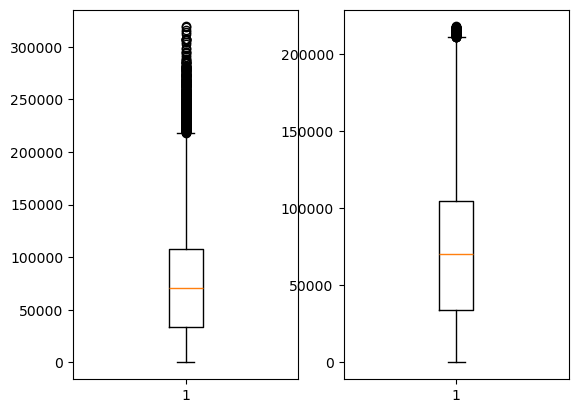

In [76]:
con1=visa_df['prevailing_wage']<LB
con2=visa_df['prevailing_wage']>UB
con=con1 | con2

median=visa_df['prevailing_wage'].median()

new_data=np.where(con,
                  median,
                  visa_df['prevailing_wage'])

visa_df_copy = visa_df.copy()
visa_df_copy['prevailing_wage'] = new_data
plt.subplot(1,2,1).boxplot(visa_df['prevailing_wage'])
plt.subplot(1,2,2).boxplot(visa_df_copy['prevailing_wage'])
plt.show()